In [2]:
import pyspark
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

plt.style.use('default') 


In [3]:
data = pd.read_csv('events.csv',low_memory = False)

In [4]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
data['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [14]:
smart = data[data['event'] == 'visited_site']
smart['model'].value_counts()

Series([], Name: model, dtype: int64)

In [66]:
data.head()

timestamp            event    person                        url  \
0  2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1  2018-05-31 23:38:05     visited site  0004b0a2                        NaN   
2  2018-05-31 23:38:09   viewed product  0004b0a2                        NaN   
3  2018-05-31 23:38:40         checkout  0004b0a2                        NaN   
4  2018-05-29 13:29:25   viewed product  0006a21a                        NaN   

       sku              model condition storage           color skus  \
0      NaN                NaN       NaN     NaN             NaN  NaN   
1      NaN                NaN       NaN     NaN             NaN  NaN   
2   2694.0          iPhone 5s       Bom    32GB  Cinza espacial  NaN   
3   2694.0          iPhone 5s       Bom    32GB  Cinza espacial  NaN   
4  15338.0  Samsung Galaxy S8       Bom    64GB         Dourado  NaN   

         ...        search_engine channel new_vs_returning        city  \
0        ...                  NaN     NaN              NaN         NaN   
1        ...                  NaN    Paid              New  Camaragibe   
2        ...                  NaN     NaN              NaN         NaN   
3        ...                  NaN     NaN              NaN         NaN   
4        ...                  NaN     NaN              NaN         NaN   

       region country device_type screen_resolution operating_system_version  \
0         NaN     NaN         NaN               NaN                      NaN   
1  Pernambuco  Brazil  Smartphone           360x640                Android 6   
2         NaN     NaN         NaN               NaN                      NaN   
3         NaN     NaN         NaN               NaN                      NaN   
4         NaN     NaN         NaN               NaN                      NaN   

    browser_version  
0               NaN  
1  Chrome Mobile 39  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 23 columns]

**1) Evento predominante en el date set**

In [40]:
#Chequeo de elementos nulos en la columna de los eventos
data['event'].isnull().any()

False

In [72]:
(data['event'].value_counts()*100)/data['event'].value_counts().sum()

viewed product       52.302707
brand listing         9.753404
visited site          8.640269
ad campaign hit       8.190248
generic listing       6.678019
searched products     5.544711
search engine hit     5.038822
checkout              3.335845
staticpage            0.355784
conversion            0.115892
lead                  0.044300
Name: event, dtype: float64

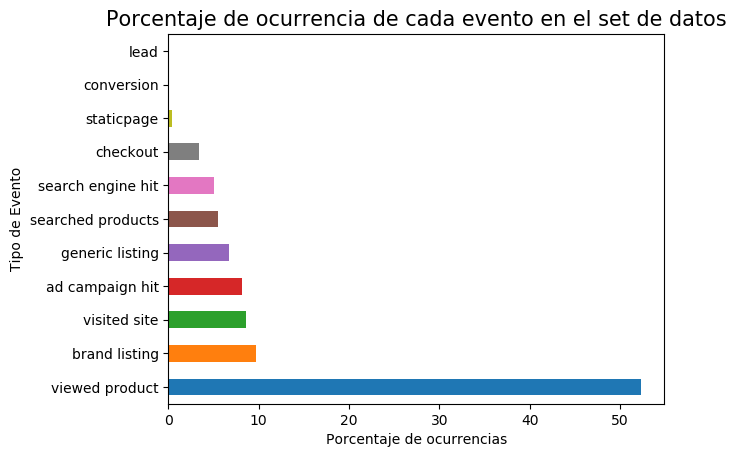

In [6]:
#Grafico
eventos = ((data['event'].value_counts()*100)/data['event'].value_counts().sum()).plot(kind='barh');
eventos.set_title('Porcentaje de ocurrencia de cada evento en el set de datos',fontsize = 15);
eventos.set_xlabel('Porcentaje de ocurrencias');
eventos.set_ylabel('Tipo de Evento');

El evento predominante es "Viewed product", mas del 50% del total.

**2) 5 productos con mayor cantidad de conversiones**

In [65]:
#Filtro filas con sku distinto de nulo y que tengan como evento 'conversion'
conversions = data[(data['event'] == 'conversion') & (data['sku']!= 'NaN')]
conversions.head()

timestamp       event    person  url     sku  \
220   2018-03-20 17:46:12  conversion  00204059  NaN  3084.0   
2282  2018-04-26 22:28:53  conversion  00c13dee  NaN  6650.0   
2547  2018-06-10 14:37:50  conversion  00fdbb4b  NaN  3348.0   
4245  2018-03-16 13:50:25  conversion  0146a9df  NaN  2694.0   
6985  2018-02-09 22:07:07  conversion  01db2fe6  NaN  6357.0   

                                 model  condition storage           color  \
220                   Motorola Moto X2  Muito Bom    32GB   Couro Vintage   
2282  Samsung Galaxy Core Plus Duos TV  Muito Bom     4GB          Branco   
2547            Samsung Galaxy S6 Flat  Muito Bom    32GB          Branco   
4245                         iPhone 5s        Bom    32GB  Cinza espacial   
6985                 Samsung Galaxy J5        Bom    16GB           Preto   

     skus       ...       search_engine channel new_vs_returning city region  \
220   NaN       ...                 NaN     NaN              NaN  NaN    NaN   
2282  NaN       ...                 NaN     NaN              NaN  NaN    NaN   
2547  NaN       ...                 NaN     NaN              NaN  NaN    NaN   
4245  NaN       ...                 NaN     NaN              NaN  NaN    NaN   
6985  NaN       ...                 NaN     NaN              NaN  NaN    NaN   

     country device_type screen_resolution operating_system_version  \
220      NaN         NaN               NaN                      NaN   
2282     NaN         NaN               NaN                      NaN   
2547     NaN         NaN               NaN                      NaN   
4245     NaN         NaN               NaN                      NaN   
6985     NaN         NaN               NaN                      NaN   

     browser_version  
220              NaN  
2282             NaN  
2547             NaN  
4245             NaN  
6985             NaN  

[5 rows x 23 columns]

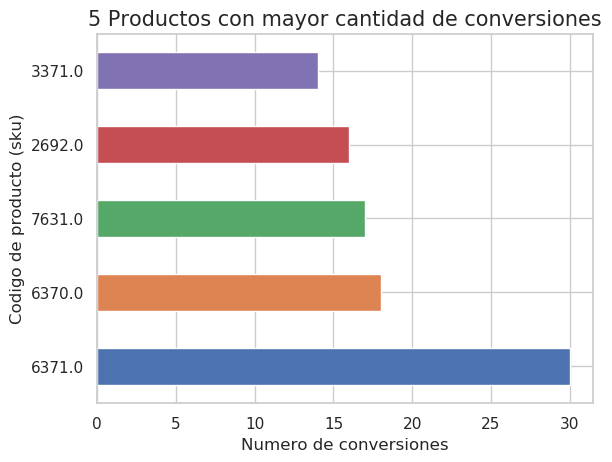

In [69]:
conv_plot = conversions['sku'].value_counts().head(5).plot(kind='barh')
conv_plot.set_title('5 Productos con mayor cantidad de conversiones', fontsize = 15);
conv_plot.set_xlabel('Numero de conversiones');
conv_plot.set_ylabel('Codigo de producto (sku)');

**3) Los 10 usuarios con mayor actividad en el sitio**

In [41]:
#Chequeo de elementos nulos en la columna de los usuarios
data['person'].isnull().any()

False

In [26]:
data['person'].value_counts().head(10)

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

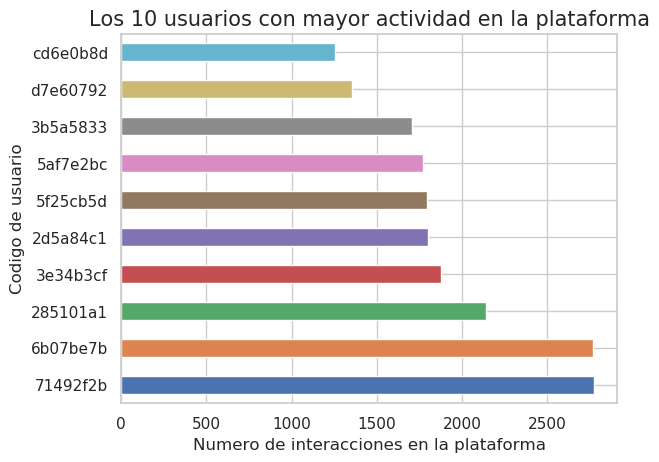

In [70]:
#Los 10 usuarios con mayor actividad en la plataforma
users = (data['person'].value_counts().head(10)).plot(kind='barh');
users.set_title('Los 10 usuarios con mayor actividad en la plataforma',fontsize = 15);
users.set_xlabel('Numero de interacciones en la plataforma');
users.set_ylabel('Codigo de usuario');